## Analysis of correlation modulation in a balanced network due to optogenetic stimulation

In [179]:
# Load some packages and the data from the simulations.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
# Load the .mat file.
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_9.mat')

## Load all the variables from the simulations.

In [180]:
mC_BurnPeriod = mat_contents['mC_BurnPeriod']
mR_BurnPeriod = mat_contents['mR_BurnPeriod']
mReeControl = mat_contents['mReeControl']
mReiControl = mat_contents['mReiControl']
mRiiControl = mat_contents['mRiiControl']
mReeLaser = mat_contents['mReeLaser']
mReiLaser = mat_contents['mReiLaser']
mRiiLaser = mat_contents['mRiiLaser']
NBlockTrials = mat_contents['NBlockTrials']
Number_of_points_corr = float(mat_contents['Number_of_points_corr'][0][0])
reLaserPeriod = mat_contents['reLaserPeriod']
riLaserPeriod = mat_contents['riLaserPeriod']
reMeanBlock = mat_contents['reMeanBlock']
riMeanBlock = mat_contents['riMeanBlock']
reMeanControl = mat_contents['reMeanControl']
riMeanControl = mat_contents['riMeanControl']
reMeanControlLaserPeriod = mat_contents['reMeanControlLaserPeriod']
riMeanControlLaserPeriod = mat_contents['riMeanControlLaserPeriod']
reMeanControlPostLaser = mat_contents['reMeanControlPostLaser']
riMeanControlPostLaser = mat_contents['riMeanControlPostLaser']
reMeanLaser = mat_contents['reMeanLaser']
riMeanLaser = mat_contents['riMeanLaser']
reMeanLaserLaserPeriod = mat_contents['reMeanLaserLaserPeriod']
riMeanLaserLaserPeriod = mat_contents['riMeanLaserLaserPeriod']
reMeanLaserPostLaser = mat_contents['reMeanLaserPostLaser']
riMeanLaserPostLaser = mat_contents['riMeanLaserPostLaser']
rePostLaserPeriod = mat_contents['rePostLaserPeriod']
riPostLaserPeriod = mat_contents['riPostLaserPeriod']
sliding_window = float(mat_contents['sliding_window'][0][0])
spikeIndex = mat_contents['spikeIndex']
spikeTimes = mat_contents['spikeTimes']
std_E_LP = mat_contents['std_E_LP']
std_I_LP = mat_contents['std_I_LP']
std_E_NLP = mat_contents['std_E_NLP']
std_I_NLP = mat_contents['std_I_NLP']
T = mat_contents['T'][0][0]
TotalJee = mat_contents['TotalJee']
TotalJei = mat_contents['TotalJei']
TotalJie = mat_contents['TotalJie']
TotalJii = mat_contents['TotalJii']
Total_number_trials = np.float(mat_contents['Total_number_trials'][0,0])
winsize = mat_contents['winsize'][0][0]
mRLaserPeriod = mat_contents['mRLaserPeriod']
mRPostLaserPeriod = mat_contents['mRPostLaserPeriod']
eRateTime = mat_contents['eRateTime']
iRateTime = mat_contents['iRateTime']
laserOnSet = mat_contents['laserOnSet'][0][0]/1000 - winsize/1000
dt=np.float(mat_contents['dt'][0][0])
N = mat_contents['N'][0][0]
mR_laserPairs_Laser = mat_contents['mR_laserPairs_Laser']
mR_nonlaserPairs_Laser = mat_contents['mR_nonlaserPairs_Laser']
mR_laserPairs_Control = mat_contents['mR_laserPairs_Control']
mR_nonlaserPairs_Control = mat_contents['mR_nonlaserPairs_Control']
mR_stderr_laserPairs_Control = mat_contents['mR_stderr_laserPairs_Control']
mR_stderr_nonlaserPairs_Control = mat_contents['mR_stderr_nonlaserPairs_Control']
mR_stderr_laserPairs_Laser = mat_contents['mR_stderr_laserPairs_Laser']
mR_stderr_nonlaserPairs_Laser = mat_contents['mR_stderr_nonlaserPairs_Laser']
mC_laserPairs_Control = mat_contents['mC_laserPairs_Control']
mC_nonlaserPairs_Control = mat_contents['mC_nonlaserPairs_Control']
mC_laserPairs_Laser = mat_contents['mC_laserPairs_Laser']
mC_nonlaserPairs_Laser = mat_contents['mC_nonlaserPairs_Laser']
mC_stderr_laserPairs_Control = mat_contents['mC_stderr_laserPairs_Control']
mC_stderr_nonlaserPairs_Control = mat_contents['mC_stderr_nonlaserPairs_Control']
mC_stderr_laserPairs_Laser = mat_contents['mC_stderr_laserPairs_Laser']
mC_stderr_nonlaserPairs_Laser = mat_contents['mC_stderr_nonlaserPairs_Laser']
Variance_laserPairs_Control = mat_contents['Variance_laserPairs_Control']
Variance_nonlaserPairs_Control = mat_contents['Variance_nonlaserPairs_Control']
Variance_laserPairs_Laser = mat_contents['Variance_laserPairs_Laser']
Variance_nonlaserPairs_Laser = mat_contents['Variance_nonlaserPairs_Laser']
Variance_stderr_laserPairs_Control = mat_contents['Variance_stderr_laserPairs_Control']
Variance_stderr_nonlaserPairs_Control = mat_contents['Variance_stderr_nonlaserPairs_Control']
Variance_stderr_laserPairs_Laser = mat_contents['Variance_stderr_laserPairs_Laser']
Variance_stderr_nonlaserPairs_Laser = mat_contents['Variance_stderr_nonlaserPairs_Laser']
rate_LaserPairs = mat_contents['rate_LaserPairs']
rate_nonLaserPairs = mat_contents['rate_nonLaserPairs']
FR_laserPairs_Laser = mat_contents['FR_laserPairs_Laser']
FR_laserPairs_Control = mat_contents['FR_laserPairs_Control']
IeCurrent = mat_contents['IeCurrent']
IiCurrent = mat_contents['IiCurrent']
IxCurrent = mat_contents['IxCurrent']
ControlTrials = mat_contents['ControlTrials']
LaserTrials = mat_contents['LaserTrials']
TrialTime = np.float(mat_contents['TrialTime'][0,0])
eta_ee = mat_contents['eta_ee'][0,0]
eta_ei = mat_contents['eta_ei'][0,0]
eta_ie_hebbian = mat_contents['eta_ie_hebbian'][0,0]
eta_ie_homeo = mat_contents['eta_ie_homeo'][0,0]
eta_ii = mat_contents['eta_ii'][0,0]



time_axis = np.arange(0, Number_of_points_corr * sliding_window, sliding_window)/1000 - laserOnSet
# time_axis = np.arange(2*sliding_window, Number_of_points_corr * sliding_window+sliding_window+1, sliding_window)/1000

In [88]:
sliding_window, Number_of_points_corr*sliding_window, laserOnSet

(50.0, 1200.0, 0.3)

## Raster plot 

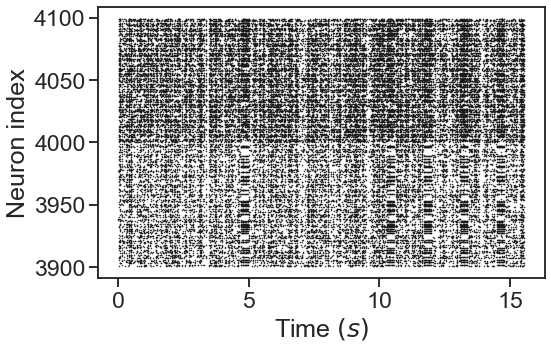

In [72]:
## Make a raster plot of last 100 E neurons and the first 100 I neurons.
# s{BlockTrial}(1,:) are the spike times
# s{BlockTrial}(2,:) are the associated neuron indices
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":3.3})


plt.plot(spikeTimes/1000, spikeIndex,'k.',fillstyle='full',markersize=1)
plt.ylabel(r'Neuron index')
plt.xlabel(r'Time $(s)$')
# plt.xticks((0,4))
# plt.xlim(0,4)
# plt.yticks((), fontsize=30)

#fig.savefig("./rasterExperiment.pdf", bbox_inches="tight",dpi=(300))

plt.show()

## Plots of corrs, covs, vars over single trials - early, late, and control

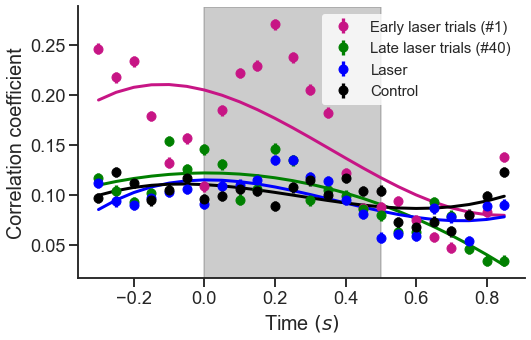

In [103]:
# Average over LASER PAIRS ONLY -Rsc

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":3.3})

# Shade area where laser is ON.
# ax.axvspan(laserOnSet-0.1, laserOnSet-0.1+0.3, alpha=0.2, color='black')
ax.axvspan(laserOnSet-0.3, laserOnSet-0.3+0.5, alpha=0.2, color='black')


BlockTrial = 1 # Pick which block to plot.
plt.errorbar(time_axis, mR_laserPairs_Laser[BlockTrial-1] , yerr=mR_stderr_laserPairs_Laser[BlockTrial-1],
         LineWidth=3,label='Early laser trials (#1)',marker='o',linestyle='', color='mediumvioletred',)
polynomial = np.polyfit(time_axis, mR_laserPairs_Laser[BlockTrial-1], 3)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='mediumvioletred')


BlockTrial = 40 # Pick which block to plot.
plt.errorbar(time_axis, mR_laserPairs_Laser[BlockTrial-1], yerr=mR_stderr_laserPairs_Laser[BlockTrial-1]
         ,LineWidth=3,label='Late laser trials (#40)',marker='o',linestyle='', color='green')
polynomial = np.polyfit(time_axis, mR_laserPairs_Laser[BlockTrial-1], 2)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='green')


#Plot mean over blocks.
plt.errorbar(time_axis, np.mean(mR_laserPairs_Laser, axis=0) , yerr=np.mean(mR_stderr_laserPairs_Laser,axis=0)
         ,LineWidth=3,label='Laser',marker='o',linestyle='', color='blue')
polynomial = np.polyfit(time_axis, np.mean(mR_laserPairs_Laser, axis=0) , 3)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='blue')

#Plot mean over blocks.
plt.errorbar(time_axis, np.mean(mR_laserPairs_Control, axis=0) , yerr=np.mean(mR_stderr_laserPairs_Control,axis=0)
         ,LineWidth=3,label='Control',marker='o',linestyle='', color='black')
polynomial = np.polyfit(time_axis, np.mean(mR_laserPairs_Control, axis=0) , 3)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='black')



#plt.errorbar( N_axis[0:-1] , np.multiply(np.transpose(np.mean(mat_contents['Record_Jmean'],axis=1)),np.sqrt(N_axis[0:-1])), 
#             yerr=yerror[0],LineWidth=3,color='green')

#plt.errorbar( N_axis[0:-1] , np.multiply(np.transpose(np.mean(mat_contents['Record_Jmean'],axis=1)),np.sqrt(N_axis[0:-1])),
#             yerr=yerror[0],color='green',linestyle = 'None',marker='o',markersize=5,
#            markeredgecolor='black')


plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Correlation coefficient')

# plt.title('Mean Control & Laser Blocks #1,10')
# plt.yticks((0,0.1,0.2,0.3,0.4),fontsize=30)
# plt.xticks((0,0.6,1.2))

# plt.xlim(-0.02,1.3)
# plt.ylim(0,0.25)

leg = plt.legend(loc='upper right',fontsize=15,frameon='none')
leg.get_frame().set_linewidth(0.0)

sns.despine()

#ax.annotate(r'\textbf{F}', xy=(100,-100 ),  xycoords='data',
#            xytext=(26, -96),usetex=True,fontsize=25)

# fig.savefig("./TCN_figs/EarlyLate_corr.pdf", bbox_inches="tight",dpi=(300))

plt.show()

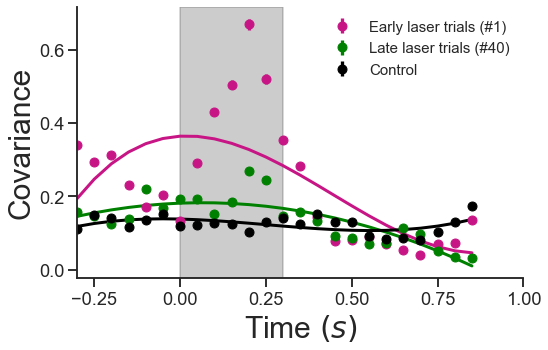

In [104]:
# Average over LASER PAIRS ONLY - COVARIANCES

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":3.3})

# Shade area where laser is ON.
ax.axvspan(laserOnSet-0.3, laserOnSet-0.3+0.3, alpha=0.2, color='black')


BlockTrial = 1 # Pick which block to plot.
plt.errorbar(time_axis, mC_laserPairs_Laser[BlockTrial-1] , yerr=mC_stderr_laserPairs_Laser[BlockTrial-1],
         LineWidth=3,label='Early laser trials (#1)',marker='o',linestyle='', color='mediumvioletred',)
polynomial = np.polyfit(time_axis, mC_laserPairs_Laser[BlockTrial-1], 3)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='mediumvioletred')


BlockTrial = 40 # Pick which block to plot.
plt.errorbar(time_axis, mC_laserPairs_Laser[BlockTrial-1], yerr=mC_stderr_laserPairs_Laser[BlockTrial-1]
         ,LineWidth=3,label='Late laser trials (#40)',marker='o',linestyle='', color='green')
polynomial = np.polyfit(time_axis, mC_laserPairs_Laser[BlockTrial-1], 2)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='green')



#Plot mean over blocks.
plt.errorbar(time_axis, np.mean(mC_laserPairs_Control, axis=0) , yerr=np.mean(mC_stderr_laserPairs_Control,axis=0)
         ,LineWidth=3,label='Control',marker='o',linestyle='', color='black')
polynomial = np.polyfit(time_axis, np.mean(mC_laserPairs_Control, axis=0) , 3)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='black')



#plt.errorbar( N_axis[0:-1] , np.multiply(np.transpose(np.mean(mat_contents['Record_Jmean'],axis=1)),np.sqrt(N_axis[0:-1])), 
#             yerr=yerror[0],LineWidth=3,color='green')

#plt.errorbar( N_axis[0:-1] , np.multiply(np.transpose(np.mean(mat_contents['Record_Jmean'],axis=1)),np.sqrt(N_axis[0:-1])),
#             yerr=yerror[0],color='green',linestyle = 'None',marker='o',markersize=5,
#            markeredgecolor='black')


plt.xlabel(r'Time $(s)$',fontsize=30)
plt.ylabel(r'Covariance',fontsize=30)

# plt.title('Mean Control & Laser Blocks #1,10')
# plt.yticks((0,0.1,0.2,0.3,0.4),fontsize=30)
# plt.xticks((0,0.6,1.2),fontsize=30)

plt.xlim(-0.3,1)
# plt.ylim(0,0.6)
# If we want no box:
#plt.box(on=None)

sns.despine()

leg = plt.legend(loc='upper right',fontsize=15,frameon='none')
leg.get_frame().set_linewidth(0.0)


#ax.annotate(r'\textbf{F}', xy=(100,-100 ),  xycoords='data',
#            xytext=(26, -96),usetex=True,fontsize=25)

# fig.savefig("./CosyneFigs/EarlyLate_Sim.pdf", bbox_inches="tight",dpi=(300))

plt.show()

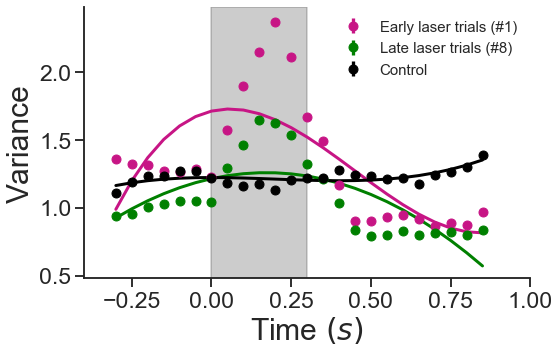

In [105]:
# Average over LASER PAIRS ONLY

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":3.3})

# Shade area where laser is ON.
ax.axvspan(laserOnSet-0.3, laserOnSet-0.3+0.3, alpha=0.2, color='black')


BlockTrial = 1 # Pick which block to plot.
plt.errorbar(time_axis, Variance_laserPairs_Laser[BlockTrial-1] , yerr=Variance_stderr_laserPairs_Laser[BlockTrial-1],
         LineWidth=3,label='Early laser trials (#1)',marker='o',linestyle='', color='mediumvioletred',)
polynomial = np.polyfit(time_axis, Variance_laserPairs_Laser[BlockTrial-1], 3)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='mediumvioletred')


BlockTrial = 8 # Pick which block to plot.
plt.errorbar(time_axis, Variance_laserPairs_Laser[BlockTrial-1], yerr=Variance_stderr_laserPairs_Laser[BlockTrial-1]
         ,LineWidth=3,label='Late laser trials (#8)',marker='o',linestyle='', color='green')
polynomial = np.polyfit(time_axis, Variance_laserPairs_Laser[BlockTrial-1], 2)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='green')



#Plot mean over blocks.
plt.errorbar(time_axis, np.mean(Variance_laserPairs_Control, axis=0) , yerr=np.mean(Variance_stderr_laserPairs_Control,axis=0)
         ,LineWidth=3,label='Control',marker='o',linestyle='', color='black')
polynomial = np.polyfit(time_axis, np.mean(Variance_laserPairs_Control, axis=0) , 3)
fit = np.polyval(polynomial,time_axis)
plt.plot(time_axis, fit ,LineWidth=3,color='black')



#plt.errorbar( N_axis[0:-1] , np.multiply(np.transpose(np.mean(mat_contents['Record_Jmean'],axis=1)),np.sqrt(N_axis[0:-1])), 
#             yerr=yerror[0],LineWidth=3,color='green')

#plt.errorbar( N_axis[0:-1] , np.multiply(np.transpose(np.mean(mat_contents['Record_Jmean'],axis=1)),np.sqrt(N_axis[0:-1])),
#             yerr=yerror[0],color='green',linestyle = 'None',marker='o',markersize=5,
#            markeredgecolor='black')


plt.xlabel(r'Time $(s)$',fontsize=30)
plt.ylabel(r'Variance',fontsize=30)

# plt.title('Mean Control & Laser Blocks #1,10')
# plt.yticks((0,0.1,0.2,0.3,0.4),fontsize=30)
# plt.xticks((0,0.6,1.2),fontsize=30)

plt.xlim(-0.4,1)
# plt.ylim(0,0.6)
# If we want no box:
#plt.box(on=None)

sns.despine()

leg = plt.legend(loc='upper right',fontsize=15,frameon='none')
leg.get_frame().set_linewidth(0.0)


#ax.annotate(r'\textbf{F}', xy=(100,-100 ),  xycoords='data',
#            xytext=(26, -96),usetex=True,fontsize=25)

# fig.savefig("./CosyneFigs/EarlyLate_Sim.pdf", bbox_inches="tight",dpi=(300))

plt.show()

## Heatmaps of corrs, covs, vars, and rates.

In [181]:
# set the colormap and centre the colorbar
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0.3, 0.5, 0.7] #[0.25, 0.5, 0.95]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


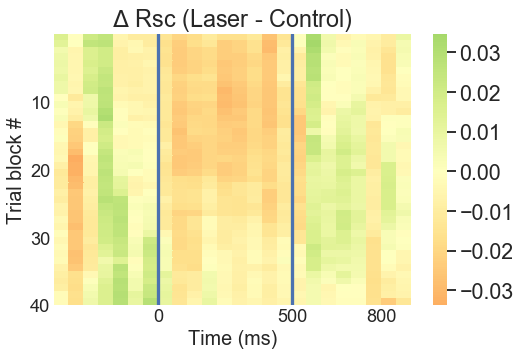

In [182]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":3.3})

ax = sns.heatmap(mR_laserPairs_Laser-np.mean(mR_laserPairs_Control, axis=0),cmap='RdYlGn',
                norm=MidpointNormalize(midpoint=0,vmin=-0,vmax=0),
                xticklabels= (0,500,800),
                yticklabels= (10,20,30,40))
plt.xticks((7,16,22))
plt.yticks((10,20,30,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7)
plt.axvline(x=16)


plt.title('$\Delta$ Rsc (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block #')

# fig.savefig("./Cosyne20_figs/corr_heatmap.pdf", bbox_inches="tight")

plt.show()

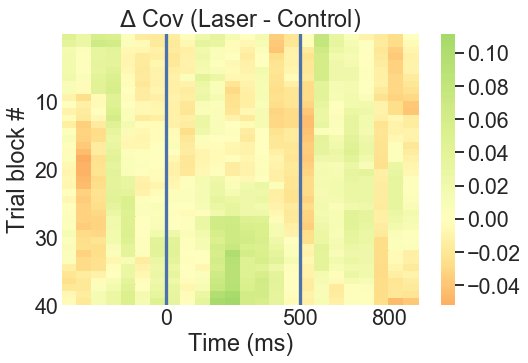

In [183]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":3.3})
ax = sns.heatmap(mC_laserPairs_Laser-np.mean(mC_laserPairs_Control, axis=0),cmap='RdYlGn',
                norm=MidpointNormalize(midpoint=0,vmin=-0.1,vmax=0.1),
                xticklabels= (0,500,800),
                yticklabels= (10,20,30,40))
plt.xticks((7,16,22))
plt.yticks((10,20,30,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7)
plt.axvline(x=16)

plt.title('$\Delta$ Cov (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block #')

# fig.savefig("./Cosyne20_figs/Cov_heatmap.pdf", bbox_inches="tight")

plt.show()

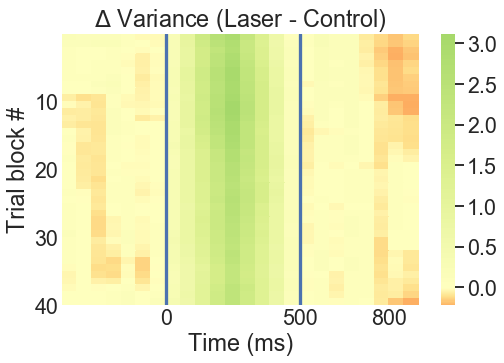

In [184]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":3.3})
ax = sns.heatmap(Variance_laserPairs_Laser-np.mean(Variance_laserPairs_Control, axis=0),cmap='RdYlGn',
                norm=MidpointNormalize(midpoint=0,vmin=-0.1,vmax=0.1),
                xticklabels= (0,500,800),
                yticklabels= (10,20,30,40))
plt.xticks((7,16,22))
plt.yticks((10,20,30,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7)
plt.axvline(x=16)

plt.title('$\Delta$ Variance (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block #')

# fig.savefig("./Cosyne20_figs/Var_heatmap.pdf", bbox_inches="tight")

plt.show()

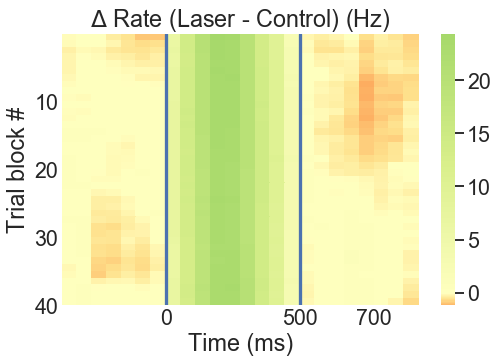

In [185]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":3.3})
ax = sns.heatmap(1000*FR_laserPairs_Laser-1000*FR_laserPairs_Control,cmap='RdYlGn',
                norm=MidpointNormalize(midpoint=0,vmin=-0.1,vmax=0.1),
                xticklabels= (0,500,700),
                yticklabels= (10,20,30,40))
plt.xticks((7,16,21))
plt.yticks((10,20,30,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7)
plt.axvline(x=16)

plt.title('$\Delta$ Rate (Laser - Control) (Hz)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block #')

# fig.savefig("./Cosyne20_figs/FR_heatmap.pdf", bbox_inches="tight")
# fig.savefig("./FR_heatmap.pdf", bbox_inches="tight",dpi=(300))

plt.show()

## Correlations over the course of a single trial for all trials.

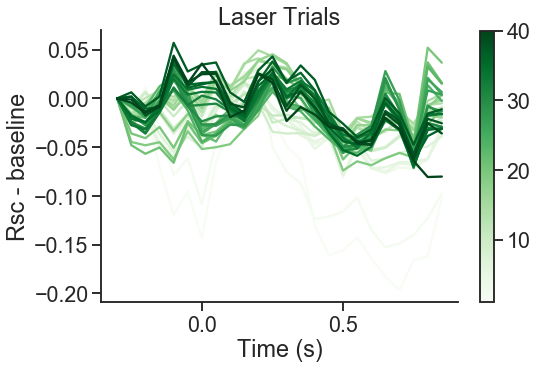

In [171]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(mR_laserPairs_Laser[:,0])
# Which bin should we take as first one?
bin = 0
a = mR_laserPairs_Laser[:,bin].reshape(np.int(NBlockTrials),1)
Laser_corrs_firstbin = np.tile(a, len(mR_laserPairs_Laser[0]))

color = cm.Greens(np.linspace(0,1,n))
X = time_axis#np.linspace(-0.3,1.2,24)
Z = mR_laserPairs_Laser - Laser_corrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rsc - baseline')

plt.title('Laser Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
cmap.set_array([])

fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/deltaCorrLaser_baseline.pdf", bbox_inches="tight")

plt.show()

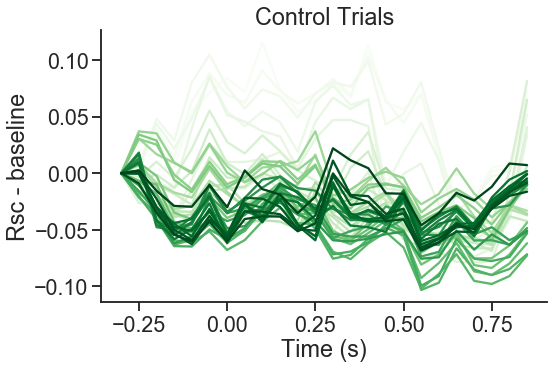

In [151]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(mR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = mR_laserPairs_Control[:,bin].reshape(np.int(NBlockTrials),1)
Control_corrs_firstbin = np.tile(a, len(mR_laserPairs_Control[0]))

color = cm.Greens(np.linspace(0,1,n))
X = time_axis #np.linspace(-0.3,1.2,24)
Z = mR_laserPairs_Control - Control_corrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rsc - baseline')

plt.title('Control Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
cmap.set_array([])

# fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/deltaCorrControl_baseline.pdf", bbox_inches="tight")


plt.show()

## Firing rates over the course of one trial for all trials.

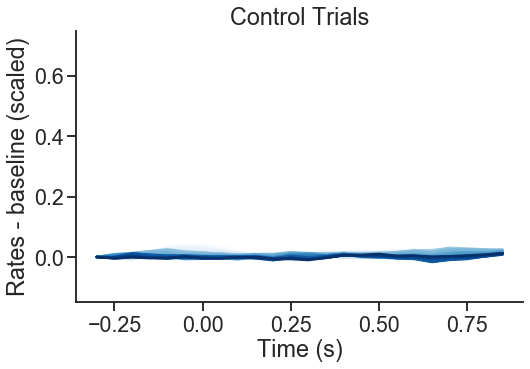

In [63]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = FR_laserPairs_Control[:,bin].reshape(np.int(NBlockTrials),1)
Control_FR_firstbin = np.tile(a, len(FR_laserPairs_Control[0]))

color = cm.Blues(np.linspace(0,1,n))
X = time_axis #np.linspace(-0.3,1.2,24)
Z = (FR_laserPairs_Control - Control_FR_firstbin)/np.max(FR_laserPairs_Laser)

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rates - baseline (scaled)')

plt.ylim((-.15,0.75))

plt.title('Control Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])

# fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/deltaFRcontrol_baseline.pdf", bbox_inches="tight")


plt.show()

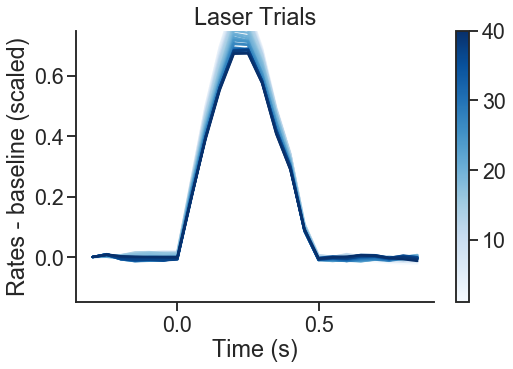

In [152]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Laser[:,0])
# Which bin to take as first one?
bin=0
a = FR_laserPairs_Laser[:,bin].reshape(np.int(NBlockTrials),1)
Laser_FR_firstbin = np.tile(a, len(FR_laserPairs_Laser[0]))

color = cm.Blues(np.linspace(0,1,n))
X = time_axis #np.linspace(-0.3,1.2,24)
Z = (FR_laserPairs_Laser - Laser_FR_firstbin)/np.max(FR_laserPairs_Laser)

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rates - baseline (scaled)')

plt.ylim((-.15,0.75))

plt.title('Laser Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])

fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/deltaFRLaser_baseline.pdf", bbox_inches="tight")

plt.show()

## Input currents analysis

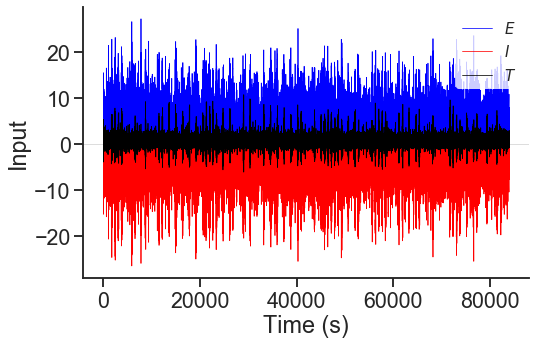

In [149]:
# Plot currents over trial blocks
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":0.75})

plt.axhline(y=0, color="lightgray")

time = 50*np.arange(1,len(IeCurrent[0])+1,step=1)/1000

plt.plot(time, IeCurrent[0]+IxCurrent[0], color='blue', label='$E$')
plt.plot(time, IiCurrent[0], color='red', label='$I$')
plt.plot(time, IeCurrent[0]+IxCurrent[0]+IiCurrent[0], color='black', label='$T$')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Input')

# plt.title('Laser period (200-500ms)')
# plt.yticks((-0.2,0,0.1),fontsize=30)
# plt.xticks((2,4,6,8,10),fontsize=30)

# plt.xlim(0.75, 10.25)
# plt.ylim(-0.5,0.1)
# If we want no box:
#plt.box(on=None)

# plt.xlim((0,100))

sns.despine()

leg = plt.legend(loc='upper right',fontsize=15,frameon='none')
leg.get_frame().set_linewidth(0.0)

#ax.annotate(r'\textbf{F}', xy=(100,-100 ),  xycoords='data',
#            xytext=(26, -96),usetex=True,fontsize=25)

# fig.savefig("./TCN_figs/deltaCorrLaser.pdf", bbox_inches="tight")

plt.show()

## Correlations over blocks for a single time bin

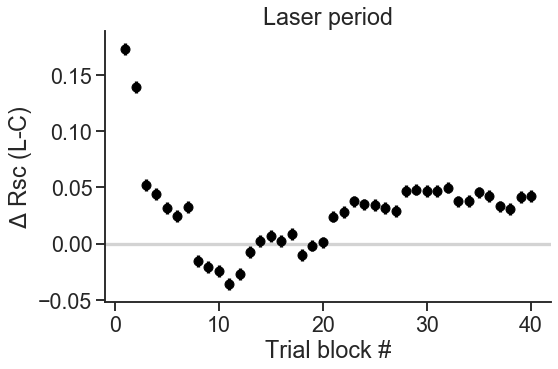

In [172]:
# Do laser pairs only. Laser period

fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":3.3})

plt.axhline(y=0, color="lightgray")

bin = 10

plt.errorbar(np.arange(1,NBlockTrials+1,step=1), mR_laserPairs_Laser[:,bin] - np.mean(mR_laserPairs_Control[:,bin]),
             yerr=mR_stderr_laserPairs_Laser[:,bin],LineWidth=3,
             marker='o',linestyle='', color='black',markersize=9)
polynomial = np.polyfit(np.arange(1,NBlockTrials+1,step=1), mR_laserPairs_Laser[:,bin] - np.mean(mR_laserPairs_Control[:,bin]) , 2)
fit = np.polyval(polynomial,np.arange(1,NBlockTrials+1,step=1))
# plt.plot(np.arange(1,NBlockTrials+1,step=1), fit ,LineWidth=3,color='black')

plt.xlabel(r'Trial block #')
plt.ylabel(r'$\Delta$ Rsc (L-C)')

plt.title('Laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))
# plt.xticks((2,4,6,8,10),fontsize=30)

# plt.xlim(0.75, 10.25)
# plt.ylim(-0.11,0.32)
# If we want no box:
#plt.box(on=None)

sns.despine()

# leg = plt.legend(loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

# fig.savefig("./Cosyne20_figs/deltaCorrLaser.pdf", bbox_inches="tight")

plt.show()



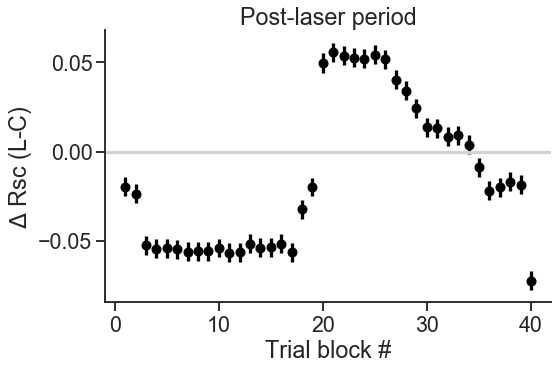

In [173]:
# Do laser pairs only. Postlaser period

fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":3.3})

plt.axhline(y=0, color="lightgray")

bin = 22

plt.errorbar(np.arange(1,NBlockTrials+1,step=1), mR_laserPairs_Laser[:,bin] - np.mean(mR_laserPairs_Control[:,bin]) 
             ,yerr=mR_stderr_laserPairs_Laser[:,bin],LineWidth=3,
             marker='o',linestyle='', color='black',markersize=9)
polynomial = np.polyfit(np.arange(1,NBlockTrials+1,step=1), mR_laserPairs_Laser[:,bin] - np.mean(mR_laserPairs_Control[:,bin]) , 1)
fit = np.polyval(polynomial,np.arange(1,NBlockTrials+1,step=1))
# plt.plot(np.arange(1,NBlockTrials+1,step=1), fit ,LineWidth=3,color='black')

plt.xlabel(r'Trial block #')
plt.ylabel(r'$\Delta$ Rsc (L-C)')

plt.title('Post-laser period')
# plt.yticks((-0.15,-0.1,-0.05,0.))
# plt.xticks((2,4,6,8,10),fontsize=30)

# plt.xlim(0.75, 10.25)
# plt.ylim(-0.5,0.1)
# If we want no box:
#plt.box(on=None)

sns.despine()

# fig.savefig("./Cosyne20_figs/deltaCorrpostLaser.pdf", bbox_inches="tight")

plt.show()

## Analysis of mean synaptic weights.

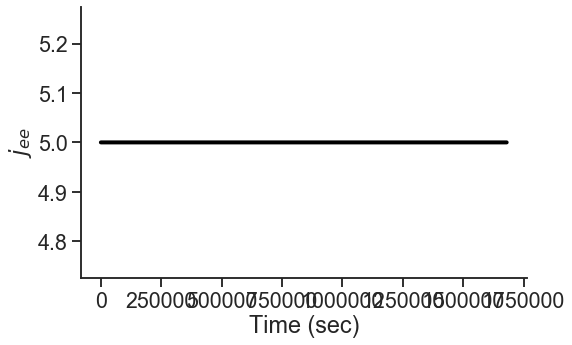

In [174]:
## Plot the time series of EE synaptic weights
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":3.3})

plt.plot(range(len(TotalJee[0])), TotalJee[0], color = "black", linewidth=4)
# plt.axvline(T*(i+1)/1000)

plt.xlabel(r'Time (sec)')
plt.ylabel(r'$j_{ee}$')

# plt.title('Average synaptic weight for whole duration of the experiment')
# plt.yticks((-300,-200,-100),fontsize=30)
# plt.xticks((0,300,600))

# plt.xlim(0,600)
# plt.ylim(-500,-100)
# If we want no box:
#plt.box(on=None)

sns.despine()

# fig.savefig("./TCN_figs/JeiBlocks.pdf", bbox_inches="tight")

plt.show()

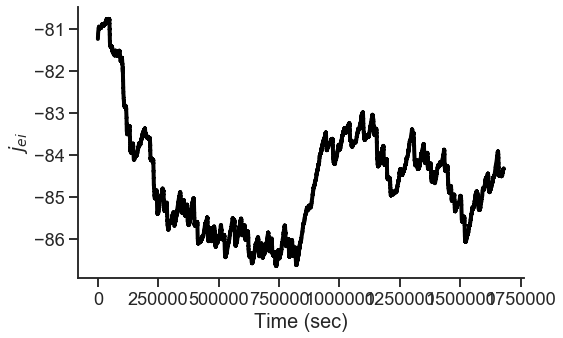

In [175]:
## Plot the time series of EI synaptic weights
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":3.3})

plt.plot(range(len(TotalJei[0])), TotalJei[0], color = "black", linewidth=4)
# plt.axvline(T*(i+1)/1000)

plt.xlabel(r'Time (sec)')
plt.ylabel(r'$j_{ei}$')

# plt.title('Average synaptic weight for whole duration of the experiment')
# plt.yticks((-300,-200,-100),fontsize=30)
# plt.xticks((0,300,600))

# plt.xlim(0,600)
# plt.ylim(-500,-100)
# If we want no box:
#plt.box(on=None)

sns.despine()

# fig.savefig("./TCN_figs/JeiBlocks.pdf", bbox_inches="tight")

plt.show()

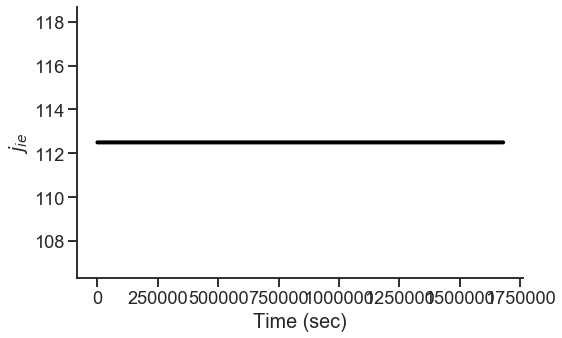

In [177]:
## Plot the time series of IE synaptic weights
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":3.3})

plt.plot(range(len(TotalJie[0])), TotalJie[0], color = "black", linewidth=4)
# plt.axvline(T*(i+1)/1000)

plt.xlabel(r'Time (sec)')
plt.ylabel(r'$j_{ie}$')

# plt.title('Average synaptic weight for whole duration of the experiment')
# plt.yticks((-300,-200,-100),fontsize=30)
# plt.xticks((0,300,600))

# plt.xlim(0,600)
# plt.ylim(-500,-100)
# If we want no box:
#plt.box(on=None)

sns.despine()

# fig.savefig("./TCN_figs/JeiBlocks.pdf", bbox_inches="tight")

plt.show()

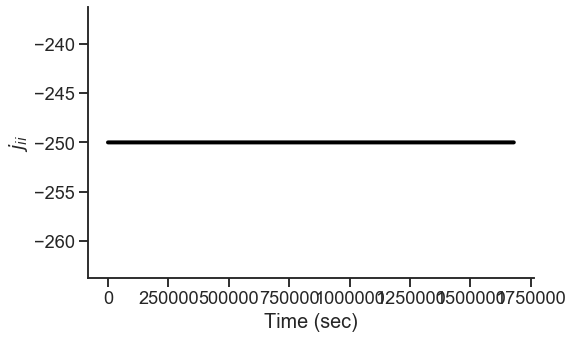

In [178]:
## Plot the time series of II synaptic weights
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":3.3})

plt.plot(range(len(TotalJii[0])), TotalJii[0], color = "black", linewidth=4)
# plt.axvline(T*(i+1)/1000)

plt.xlabel(r'Time (sec)')
plt.ylabel(r'$j_{ii}$')

# plt.title('Average synaptic weight for whole duration of the experiment')
# plt.yticks((-300,-200,-100),fontsize=30)
# plt.xticks((0,300,600))

# plt.xlim(0,600)
# plt.ylim(-500,-100)
# If we want no box:
#plt.box(on=None)

sns.despine()

# fig.savefig("./TCN_figs/JeiBlocks.pdf", bbox_inches="tight")

plt.show()

In [160]:
Control_Jee = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
Laser_Jee = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
j=0;k=0;
TrialTime = np.int(TrialTime)
for i in range(np.int(Total_number_trials)):
    if np.isin(i+1,ControlTrials):
        Control_Jee[j,0:np.int(TrialTime/dt)] = TotalJee[0,i*TrialTime:i*TrialTime+np.int(TrialTime/dt)]
        j+=1
    else:
        Laser_Jee[k,0:np.int(TrialTime/dt)] = TotalJee[0,i*TrialTime:i*TrialTime+np.int(TrialTime/dt)]
        k+=1



In [161]:
Control_Jei = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
Laser_Jei = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
j=0;k=0;
TrialTime = np.int(TrialTime)
dt=0.1
for i in range(np.int(Total_number_trials)):
    if np.isin(i+1,ControlTrials):
        Control_Jei[j,0:np.int(TrialTime/dt)] = TotalJei[0,i*TrialTime:i*TrialTime+np.int(TrialTime/dt)]
        j+=1
    else:
        Laser_Jei[k,0:np.int(TrialTime/dt)] = TotalJei[0,i*TrialTime:i*TrialTime+np.int(TrialTime/dt)]
        k+=1



In [162]:
Control_Jie = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
Laser_Jie = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
j=0;k=0;
TrialTime = np.int(TrialTime)
dt=0.1
for i in range(np.int(Total_number_trials)):
    if np.isin(i+1,ControlTrials):
        Control_Jie[j,0:np.int(TrialTime/dt)] = TotalJie[0,i*TrialTime:i*TrialTime+np.int(TrialTime/dt)]
        j+=1
    else:
        Laser_Jie[k,0:np.int(TrialTime/dt)] = TotalJie[0,i*TrialTime:i*TrialTime+np.int(TrialTime/dt)]
        k+=1



In [163]:
Control_Jii = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
Laser_Jii = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
j=0;k=0;
TrialTime = np.int(TrialTime)
dt=0.1
for i in range(np.int(Total_number_trials)):
    if np.isin(i+1,ControlTrials):
        Control_Jii[j,0:np.int(TrialTime/dt)] = TotalJii[0,i*TrialTime:i*TrialTime+np.int(TrialTime/dt)]
        j+=1
    else:
        Laser_Jii[k,0:np.int(TrialTime/dt)] = TotalJii[0,i*TrialTime:i*TrialTime+np.int(TrialTime/dt)]
        k+=1



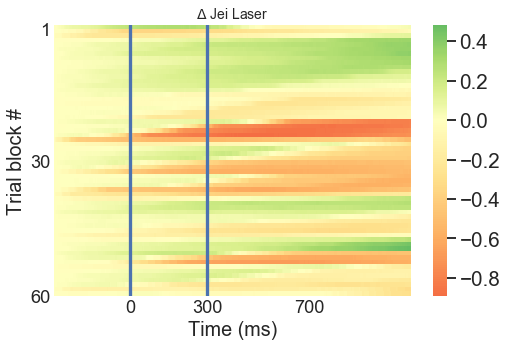

In [72]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.25, rc={"lines.linewidth":3.3})

a = Laser_Jei[:,0].reshape(np.int(Total_number_trials/2),1)
Laser_Jei_firstbin = np.tile(a, (np.int(TrialTime/dt)))

ax = sns.heatmap(Laser_Jei-Laser_Jei_firstbin,cmap='RdYlGn',
                norm=MidpointNormalize(midpoint=0,vmin=-0.1,vmax=0.1),
                xticklabels= (0,300,700),
                yticklabels=(1,30,60))
plt.xticks((laserOnSet*1000/dt,(laserOnSet+0.3)*1000/dt,(laserOnSet+0.7)*1000/dt))
plt.yticks((1,30,60))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=(laserOnSet)*1000/dt)
plt.axvline(x=(laserOnSet+0.3)*1000/dt)


plt.title('$\Delta$ Jei Laser',fontsize=14)
plt.xlabel('Time (ms)')
plt.ylabel('Trial block #')

# fig.savefig("./TCN_figs/corr_heatmap.pdf", bbox_inches="tight")

plt.show()

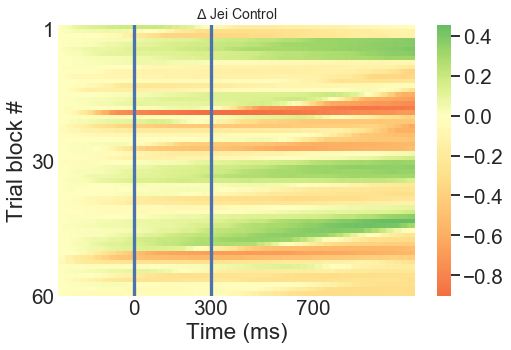

In [73]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.25, rc={"lines.linewidth":3.3})

a = Control_Jei[:,0].reshape(np.int(Total_number_trials/2),1)
Control_Jei_firstbin = np.tile(a, (np.int(TrialTime/dt)))

ax = sns.heatmap(Control_Jei-Control_Jei_firstbin,cmap='RdYlGn',
                norm=MidpointNormalize(midpoint=0,vmin=-0.1,vmax=0.1),
                xticklabels= (0,300,700),
                yticklabels=(1,30,60))
plt.xticks((laserOnSet*1000/dt,(laserOnSet+0.3)*1000/dt,(laserOnSet+0.7)*1000/dt))
plt.yticks((1,30,60))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=(laserOnSet)*1000/dt)
plt.axvline(x=(laserOnSet+0.3)*1000/dt)


plt.title('$\Delta$ Jei Control',fontsize=14)
plt.xlabel('Time (ms)')
plt.ylabel('Trial block #')

# fig.savefig("./TCN_figs/corr_heatmap.pdf", bbox_inches="tight")

plt.show()

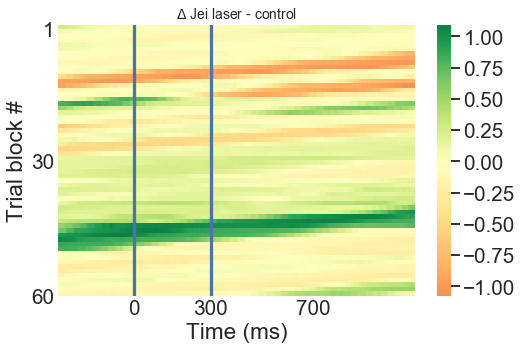

In [26]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.25, rc={"lines.linewidth":3.3})

ax = sns.heatmap(Laser_Jei-Control_Jei,cmap='RdYlGn',
                norm=MidpointNormalize(midpoint=0,vmin=-0.1,vmax=0.1),
                xticklabels= (0,300,700),
                yticklabels=(1,30,60))
plt.xticks((laserOnSet*1000/dt,(laserOnSet+0.3)*1000/dt,(laserOnSet+0.7)*1000/dt))
plt.yticks((1,30,60))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=(laserOnSet)*1000/dt)
plt.axvline(x=(laserOnSet+0.3)*1000/dt)


plt.title('$\Delta$ Jei laser - control',fontsize=14)
plt.xlabel('Time (ms)')
plt.ylabel('Trial block #')

# fig.savefig("./TCN_figs/corr_heatmap.pdf", bbox_inches="tight")

plt.show()

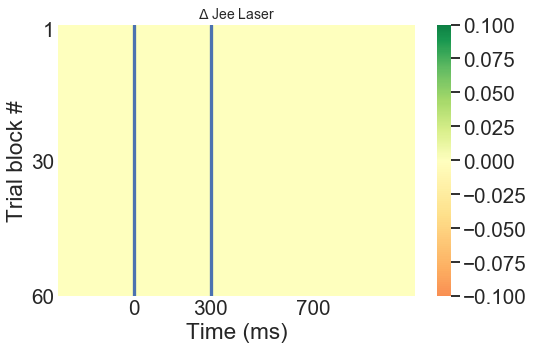

In [27]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.25, rc={"lines.linewidth":3.3})

a = Laser_Jee[:,0].reshape(np.int(Total_number_trials/2),1)
Laser_Jee_firstbin = np.tile(a, (np.int(TrialTime/dt)))

ax = sns.heatmap(Laser_Jee-Laser_Jee_firstbin,cmap='RdYlGn',
                norm=MidpointNormalize(midpoint=0,vmin=-0.1,vmax=0.1),
                xticklabels= (0,300,700),
                yticklabels=(1,30,60))
plt.xticks((laserOnSet*1000/dt,(laserOnSet+0.3)*1000/dt,(laserOnSet+0.7)*1000/dt))
plt.yticks((1,30,60))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=(laserOnSet)*1000/dt)
plt.axvline(x=(laserOnSet+0.3)*1000/dt)


plt.title('$\Delta$ Jee Laser',fontsize=14)
plt.xlabel('Time (ms)')
plt.ylabel('Trial block #')

# fig.savefig("./TCN_figs/corr_heatmap.pdf", bbox_inches="tight")

plt.show()

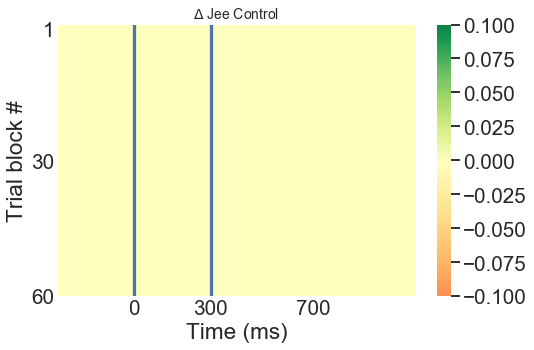

In [28]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.25, rc={"lines.linewidth":3.3})

a = Control_Jee[:,0].reshape(np.int(Total_number_trials/2),1)
Control_Jee_firstbin = np.tile(a, (np.int(TrialTime/dt)))

ax = sns.heatmap(Control_Jee-Control_Jee_firstbin,cmap='RdYlGn',
                norm=MidpointNormalize(midpoint=0,vmin=-0.1,vmax=0.1),
                xticklabels= (0,300,700),
                yticklabels=(1,30,60))
plt.xticks((laserOnSet*1000/dt,(laserOnSet+0.3)*1000/dt,(laserOnSet+0.7)*1000/dt))
plt.yticks((1,30,60))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=(laserOnSet)*1000/dt)
plt.axvline(x=(laserOnSet+0.3)*1000/dt)


plt.title('$\Delta$ Jee Control',fontsize=14)
plt.xlabel('Time (ms)')
plt.ylabel('Trial block #')

# fig.savefig("./TCN_figs/corr_heatmap.pdf", bbox_inches="tight")

plt.show()

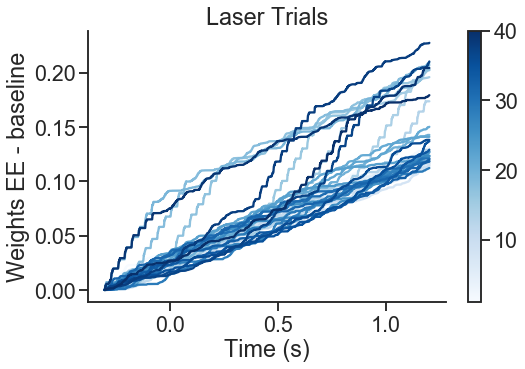

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = Laser_Jee[:,0].reshape(np.int(Total_number_trials/2),1)
Laser_Jee_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Blues(np.linspace(0,1,n))
X = np.linspace(-0.3,1.2,14000)
Z = Laser_Jee - Laser_Jee_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel(r'Weights EE - baseline')

plt.title('Laser Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])

fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/Jei_change_laser.pdf", bbox_inches="tight")

plt.show()

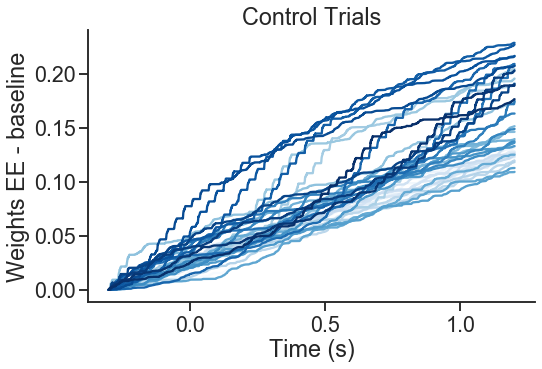

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = Control_Jee[:,0].reshape(np.int(Total_number_trials/2),1)
Control_Jee_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Blues(np.linspace(0,1,n))
X = np.linspace(-0.3,1.2,14000)
Z = Control_Jee - Control_Jee_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Weights EE - baseline')

plt.title('Control Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])

# fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/Jei_change_control.pdf", bbox_inches="tight")

plt.show()

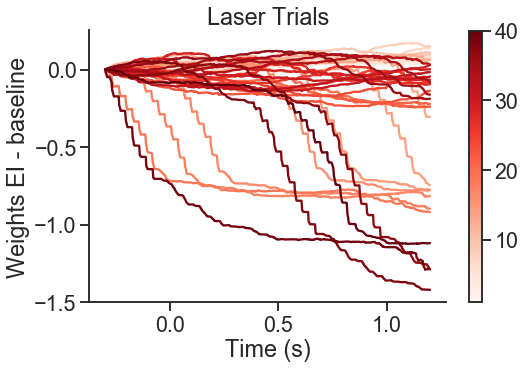

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = Laser_Jei[:,0].reshape(np.int(Total_number_trials/2),1)
Laser_Jei_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Reds(np.linspace(0,1,n))
X = np.linspace(-0.3,1.2,14000)
Z = Laser_Jei - Laser_Jei_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel(r'Weights EI - baseline')

plt.title('Laser Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
cmap.set_array([])

fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/Jei_change_laser.pdf", bbox_inches="tight")

plt.show()

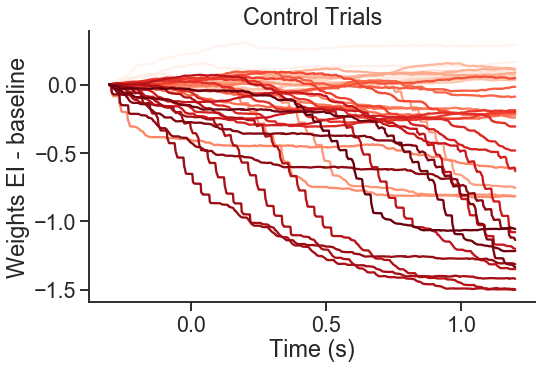

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = Control_Jei[:,0].reshape(np.int(Total_number_trials/2),1)
Control_Jei_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Reds(np.linspace(0,1,n))
X = np.linspace(-0.3,1.2,14000)
Z = Control_Jei - Control_Jei_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Weights EI - baseline')

plt.title('Control Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
cmap.set_array([])

# fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/Jei_change_control.pdf", bbox_inches="tight")

plt.show()

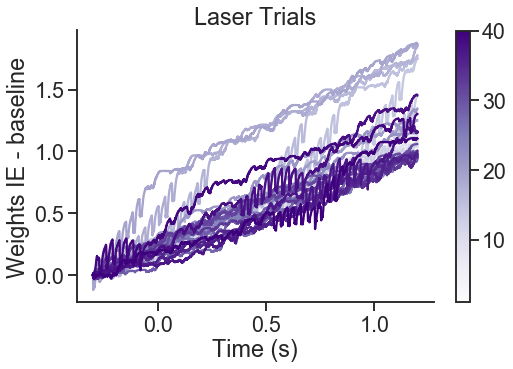

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = Laser_Jie[:,0].reshape(np.int(Total_number_trials/2),1)
Laser_Jie_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Purples(np.linspace(0,1,n))
X = np.linspace(-0.3,1.2,14000)
Z = Laser_Jie - Laser_Jie_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel(r'Weights IE - baseline')

plt.title('Laser Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Purples)
cmap.set_array([])

fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/Jei_change_laser.pdf", bbox_inches="tight")

plt.show()

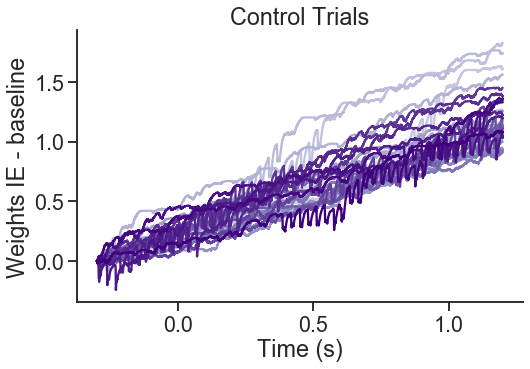

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = Control_Jie[:,0].reshape(np.int(Total_number_trials/2),1)
Control_Jie_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Purples(np.linspace(0,1,n))
X = np.linspace(-0.3,1.2,14000)
Z = Control_Jie - Control_Jie_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Weights IE - baseline')

plt.title('Control Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Purples)
cmap.set_array([])

# fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/Jei_change_control.pdf", bbox_inches="tight")

plt.show()

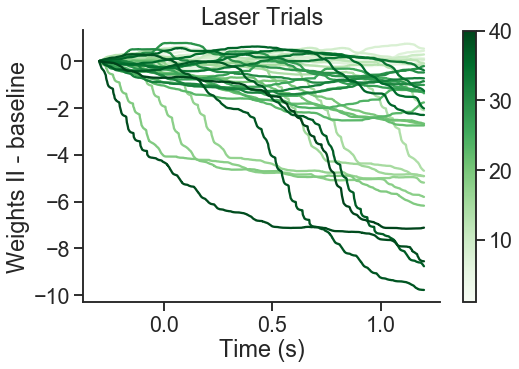

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = Laser_Jii[:,0].reshape(np.int(Total_number_trials/2),1)
Laser_Jii_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Greens(np.linspace(0,1,n))
X = np.linspace(-0.3,1.2,14000)
Z = Laser_Jii - Laser_Jii_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel(r'Weights II - baseline')

plt.title('Laser Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
cmap.set_array([])

fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/Jei_change_laser.pdf", bbox_inches="tight")

plt.show()

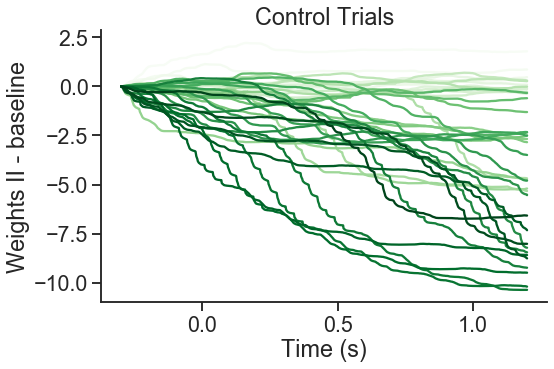

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":2.3})

n = len(FR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = Control_Jii[:,0].reshape(np.int(Total_number_trials/2),1)
Control_Jii_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Greens(np.linspace(0,1,n))
X = np.linspace(-0.3,1.2,14000)
Z = Control_Jii - Control_Jii_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Weights II - baseline')

plt.title('Control Trials')

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
cmap.set_array([])

# fig.colorbar(cmap)

# fig.savefig("./Cosyne20_figs/Jei_change_control.pdf", bbox_inches="tight")

plt.show()

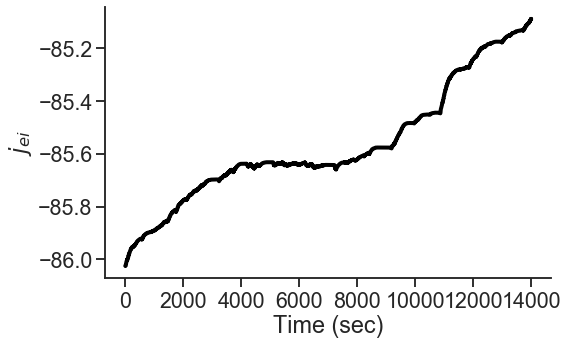

In [409]:
## Plot the time series of on trial average synaptic weights
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":3.3})

plt.plot(range(len(Control_Jei[0])), Control_Jei[1], color = "black", linewidth=4)
# plt.axvline(T*(i+1)/1000)

plt.xlabel(r'Time (sec)')
plt.ylabel(r'$j_{ei}$')

# plt.title('Average synaptic weight for whole duration of the experiment')
# plt.yticks((-300,-200,-100),fontsize=30)
# plt.xticks((0,300,600))

# plt.xlim(0,60000)
# plt.ylim(-500,-100)
# If we want no box:
#plt.box(on=None)

sns.despine()

# fig.savefig("./TCN_figs/JeiBlocks.pdf", bbox_inches="tight")

plt.show()

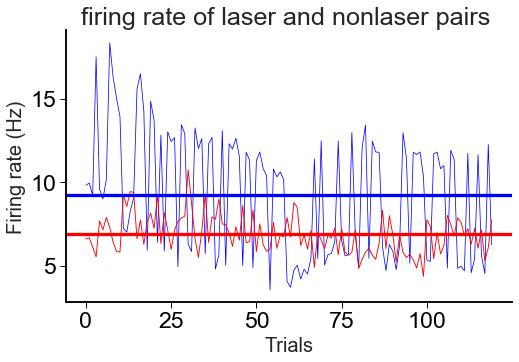

In [69]:
## Plot the

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":3.3})

fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)
dtRate=100


plt.plot(range(len(rate_LaserPairs[0])), 1000*rate_LaserPairs[0], color = "blue",label='Laser pairs',linewidth = 0.75)
plt.plot(range(len(rate_nonLaserPairs[0])), 1000*rate_nonLaserPairs[0], color = "red",label='Nonlaser pairs',linewidth = 0.9)
plt.axhline(1000*np.mean(np.mean(rate_LaserPairs)),color='blue')
plt.axhline(1000*np.mean(np.mean(rate_nonLaserPairs)),color='red')


plt.xlabel(r'Trials',fontsize=20)
plt.ylabel(r'Firing rate (Hz)',fontsize=20)

plt.title('firing rate of laser and nonlaser pairs ')
#plt.yticks((-150,-120,-90),fontsize=30)
#plt.xticks((100,1000,10000),fontsize=30)

#plt.xlim(N_axis[0]-20,N_axis[-2]+200)
#plt.ylim(-151, -89)
# If we want no box:
#plt.box(on=None)

#If we want only x and y axis:
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.tick_params(length=6)
ax.tick_params(width=1)

# leg = plt.legend(loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)


sns.despine()



# plt.xlim((0,T*10/1000))
# plt.xlim((2,4))
# plt.ylim((0,50))

#ax.annotate(r'\textbf{F}', xy=(100,-100 ),  xycoords='data',
#            xytext=(26, -96),usetex=True,fontsize=25)

#if mat_contents['c'][0][0]==0:
#    fig.savefig("./Figure1/JeiUncorr.pdf", bbox_inches="tight",dpi=(300))   
#else:
#    fig.savefig("./Figure2/JeiCorr.pdf", bbox_inches="tight",dpi=(300))

plt.show()